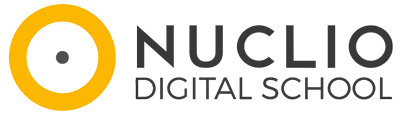

# **Entregable módulo 4: Análisis de datos - Proyecto final**

**Importante:** Guarda este fichero con la nomenclatura *Nombre_apellido_DataAnalysis.ipynb*

## **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

      **Importante:** Se deberá incluir al menos un año adicional de información

## **Preguntas obligatorias a responder (para cada una de las fases)**
- **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)
- **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?
- **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

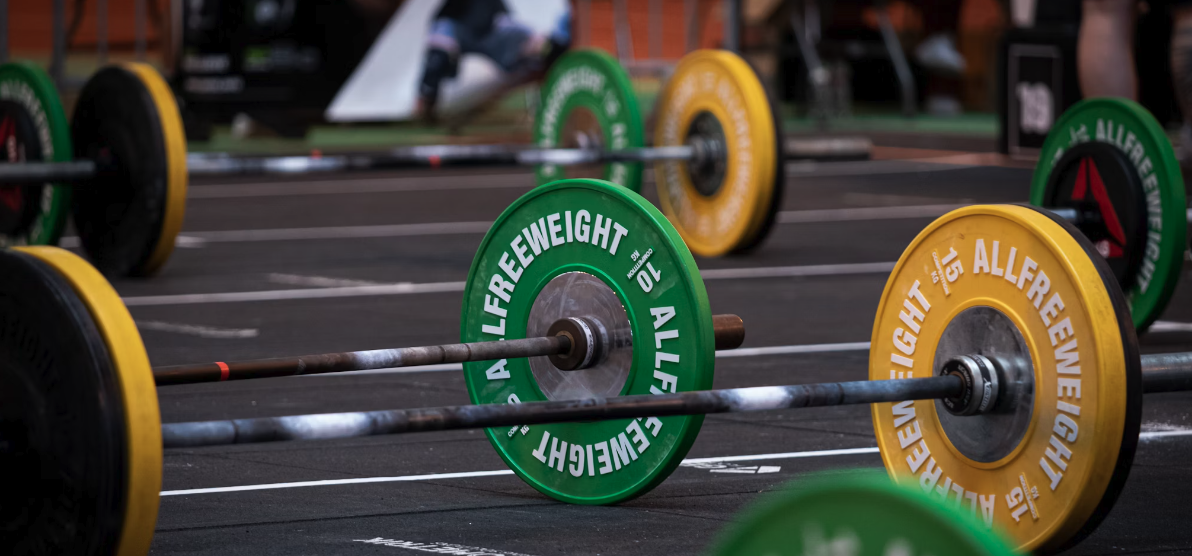

# **Fase 1.** Con la información disponible en el campus virtual

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [1]:
pip install tabulate 


Note: you may need to restart the kernel to use updated packages.


🔍  1. Manipulación y análisis de datos

In [2]:
import pandas as pd
import numpy as np

🧼 2. Limpieza de texto y expresiones regulares

In [3]:
import re

📊 3. Visualización de datos

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## 1. Carga de datos

- **Paso 1: Carga los datos**

In [5]:
df_2019 = pd.read_csv(r'C:\Users\paran\OneDrive\Escritorio\Master Data Analytics\M4 Analisis Exploratorio Datos\Entregable 3 Analisis exploratorio datos\2019_Datos_Campeonato_Europeo_de_Halterofilia.csv')
df_2020 = pd.read_csv(r'C:\Users\paran\OneDrive\Escritorio\Master Data Analytics\M4 Analisis Exploratorio Datos\Entregable 3 Analisis exploratorio datos\2020_Datos_Campeonato_Europeo_de_Halterofilia.csv')


# Vista previa para verificar los datos

print("📊 Datos 2019:")
display(df_2019.head())

print("📊 Datos 2020:")
display(df_2020.head())

📊 Datos 2019:


Eventos                                             Oro  \
0  55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
1  61 kg (07.04)     Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)        Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)      Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)      Antonino Pizzolato Italia  155 + 201 = 356   

                                          Plata  \
0  Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
1       Bünyamin Sezer Turquía  132 + 151 = 283   
2    Simon Brandhuber Alemania  146 + 165 = 311   
3         Briken Calja Albania  156 + 183 = 339   
4   Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                         Bronce   Año     Genero  
0  Muammer Şahin Turquía  112 + 135 = 247[n 1]​  2019  Masculino  
1         Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2        Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3   Vadzim Lijarad Bielorrusia  153 + 182 = 335  2019  Masculino  
4     Ritvars Suharevs Letonia  162 + 192 = 354  2019  Masculino

📊 Datos 2020:


Eventos                                           Oro  \
0  55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​   
1  61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296   
2  67 kg (05.04)       Muhammed Özbek Turquía  145 + 178 = 323   
3  73 kg (06.04)    Daniyar İsmayilov Turquía  160 + 181 = 341   
4  81 kg (07.04)    Antonino Pizzolato Italia  164 + 206 = 370   

                                           Plata  \
0  Valentin Iancu Rumania  108 + 140 = 248[n 1]​   
1     Shota Mishvelidze Georgia  135 + 155 = 290   
2            Mirko Zanni Italia  148 + 170 = 318   
3           Marin Robu Moldavia  156 + 183 = 339   
4         Karlos Nasar Bulgaria  163 + 206 = 369   

                                             Bronce   Año     Genero  
0  Dmytro Voronovsky Ucrania  110 + 137 = 247[n 1]​  2020  Masculino  
1             Ferdi Hardal Turquía  130 + 157 = 287  2020  Masculino  
2       Valentin Guenchev Bulgaria  138 + 177 = 315  2020  Masculino  
3             Briken Calja Albania  152 + 184 = 336  2020  Masculino  
4         Ritvars Suharevs Letonia  157 + 190 = 347  2020  Masculino

## 2. Exploración inicial

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

#### ¿ Cuántas filas y columnas hay en el conjunto de datos ?

In [6]:
df_2019.shape
df_2020.shape

(20, 6)

Tanto el conjunto de datos de 2019 como el de 2020 contienen:

✅ 20 filas

✅ 6 columnas

Esto indica que cada archivo representa 20 eventos o categorías de competición (probablemente divididas por peso y género), y las columnas registran información como medallas, año y género.

##### ¿ Cuáles son las primeras cinco filas del conjunto de datos ? 

In [7]:
print(df_2019.head(5))  # Para el DataFrame de 2019
print(df_2020.head(5))  # Para el DataFrame de 2020


         Eventos                                             Oro  \
0  55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
1  61 kg (07.04)     Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)        Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)      Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)      Antonino Pizzolato Italia  155 + 201 = 356   

                                          Plata  \
0  Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
1       Bünyamin Sezer Turquía  132 + 151 = 283   
2    Simon Brandhuber Alemania  146 + 165 = 311   
3         Briken Calja Albania  156 + 183 = 339   
4   Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                         Bronce   Año     Genero  
0  Muammer Şahin Turquía  112 + 135 = 247[n 1]​  2019  Masculino  
1         Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2        Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3   Vadzim Lijar

#### ¿ Cuáles son las últimas cinco filas del conjunto de datos ? 

In [8]:
# Últimas 5 filas del dataset 2019
print("📅 Últimas filas de df_2019:")
display(df_2019.tail(5))

# Últimas 5 filas del dataset 2020
print("📅 Últimas filas de df_2020:")
display(df_2020.tail(5))


📅 Últimas filas de df_2019:


Eventos                                         Oro  \
15        71 kg (10.04)  Anastasiya Romanova Rusia  112 + 128 = 240   
16        76 kg (11.04)  Daria Naumava Bielorrusia  106 + 136 = 242   
17  81 kg[n 2]​ (12.04)      Nina Schroth Alemania  102 + 120 = 222   
18        87 kg (12.04)       Xeniya Pasjina Rusia  110 + 132 = 242   
19       +87 kg (13.04)    Tatiana Kashirina Rusia  146 + 185 = 331   

                                           Plata  \
15      Emily Godley Reino Unido  93 + 123 = 216   
16    Lidia Valentín[2]​ España  108 + 133 = 241   
17  Anna Van Bellinghen Bélgica  103 + 118 = 221   
18         Diana Mstiyeva Rusia  110 + 130 = 240   
19   Anastasiya Lysenko Ucrania  120 + 148 = 268   

                                         Bronce   Año    Genero  
15      Mădălina Molie Rumania  101 + 114 = 215  2019  Femenino  
16    Patricia Strenius Suecia  101 + 132 = 233  2019  Femenino  
17    Liana Guiurdzhian Armenia  97 + 120 = 217  2019  Femenino  
18       Sarah Fischer Austria  102 + 129 = 231  2019  Femenino  
19  Emily Campbell Reino Unido  115 + 145 = 260  2019  Femenino

📅 Últimas filas de df_2020:


Eventos                                          Oro  \
15   71 kg (07.04)     Emily Godley Reino Unido  98 + 129 = 227   
16   76 kg (08.04)          Iryna Deja Ucrania  113 + 135 = 248   
17   81 kg (09.04)    Alina Marushchak Ucrania  109 + 127 = 236   
18   87 kg (10.04)        Daria Ajmerova Rusia  108 + 138 = 246   
19  +87 kg (11.04)  Emily Campbell Reino Unido  122 + 154 = 276   

                                             Plata  \
15          Alessia Durante Italia  97 + 122 = 219   
16            Yana Sotiyeva Rusia  112 + 134 = 246   
17  Gaëlle Nayo-Ketchanke Francia  100 + 131 = 231   
18          Elena Cîlcic Moldavia  107 + 138 = 245   
19     Anastasiya Lysenko Ucrania  116 + 136 = 252   

                                        Bronce   Año    Genero  
15        Raluca Olaru Rumania  98 + 120 = 218  2020  Femenino  
16  Anastasiya Romanova Rusia  111 + 132 = 243  2020  Femenino  
17   Liana Guiurdzhian Armenia  98 + 129 = 227  2020  Femenino  
18      Daria Riazanova Rusia  105 + 135 = 240  2020  Femenino  
19       Melike Günal Turquía  108 + 135 = 243  2020  Femenino

##### ¿ Cuáles son las columnas  del conjunto de datos ? 

In [9]:
# Mostrar las columnas del DataFrame de 2019
print("📋 Columnas de df_2019:")
print(df_2019.columns.tolist())

# Mostrar las columnas del DataFrame de 2020
print("\n📋 Columnas de df_2020:")
print(df_2020.columns.tolist())


📋 Columnas de df_2019:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']

📋 Columnas de df_2020:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']


#### ¿ Cuál es el tipo de datos de cada columna ?

In [10]:
# Tipos de datos para df_2019
print("📊 Tipos de datos en df_2019:")
print(df_2019.dtypes)

# Tipos de datos para df_2020
print("\n📊 Tipos de datos en df_2020:")
print(df_2020.dtypes)


📊 Tipos de datos en df_2019:
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

📊 Tipos de datos en df_2020:
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object


#### ¿ Cuáles son las variables numéricas ?

In [11]:
# Variables numéricas en df_2019
print("📐 Variables numéricas en df_2019:")
print(df_2019.select_dtypes(include=['int64', 'float64']).columns.tolist())


# Variables numéricas en df_2020
print("\n📐 Variables numéricas en df_2020:")
print(df_2020.select_dtypes(include=['int64', 'float64']).columns.tolist())


📐 Variables numéricas en df_2019:
['Año']

📐 Variables numéricas en df_2020:
['Año']


#### ¿ Cuáles son las variables categóricas ? 

In [12]:
# Variables categóricas en df_2019
print("\n🧩 Variables categóricas en df_2019:")
print(df_2019.select_dtypes(include=['object']).columns.tolist())


# Variables categóricas en df_2020
print("\n🧩 Variables categóricas en df_2020:")
print(df_2020.select_dtypes(include=['object']).columns.tolist())



🧩 Variables categóricas en df_2019:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']

🧩 Variables categóricas en df_2020:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']


#### ¿ Cómo podríamos obtener información más completa sobre las estructura y el contenido del DataFrame ?

🧾 1. .info() – Resumen estructural

Muestra número de entradas, columnas, tipos de datos y valores no nulos:

In [13]:
print(df_2019.info())
print(df_2020.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None


📊 2. .describe() – Estadísticas básicas

Solo aplica a columnas numéricas por defecto. Para ver las categóricas, usa

In [14]:
print(df_2019.describe())                  # Estadísticas numéricas
print(df_2019.describe(include='object'))  # Estadísticas de texto


          Año
count    20.0
mean   2019.0
std       0.0
min    2019.0
25%    2019.0
50%    2019.0
75%    2019.0
max    2019.0
              Eventos                                             Oro  \
count              20                                              20   
unique             20                                              20   
top     55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
freq                1                                               1   

                                               Plata  \
count                                             20   
unique                                            20   
top     Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
freq                                               1   

                                              Bronce     Genero  
count                                             20         20  
unique                                            20          2  
top     Muammer Şahin Turquía

🔍 3. .value_counts() – Frecuencia de valores únicos
Para columnas catagóricas como 'Genero'

In [15]:
print(df_2019['Genero'].value_counts())
print(df_2020['Genero'].value_counts())


Genero
Masculino    10
Femenino     10
Name: count, dtype: int64
Genero
Masculino    10
Femenino     10
Name: count, dtype: int64


📦 4. .nunique() – Nº de valores únicos por columna

Te dice cuántos valores distintos hay por columna:

In [16]:
print(df_2019.nunique())
print(df_2020.nunique())



Eventos    20
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64
Eventos    19
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64


🔧 5. .isnull().sum() – Recuento de valores nulos

In [17]:
print(df_2019.isnull().sum())
print(df_2020.isnull().sum())

Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64


## 3. Limpieza de datos

- **Paso 3: Asegúrate de que los datos no contengan valores problemáticos**

In [18]:
# Verificar valores nulos en df_2019
print("🔍 Valores nulos en df_2019:")
print(df_2019.isnull().sum())

# Verificar valores nulos en df_2020
print("\n🔍 Valores nulos en df_2020:")
print(df_2020.isnull().sum())

# Verificar filas duplicadas en df_2019
print("\n📎 Filas duplicadas en df_2019:")
print(df_2019.duplicated().sum())

# Verificar filas duplicadas en df_2020
print("\n📎 Filas duplicadas en df_2020:")
print(df_2020.duplicated().sum())


🔍 Valores nulos en df_2019:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

🔍 Valores nulos en df_2020:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

📎 Filas duplicadas en df_2019:
0

📎 Filas duplicadas en df_2020:
0


Los datos están completamente limpios en cuanto a estructura. Aquí el resumen:

| Validación       | df\_2019  | df\_2020 |
| ---------------- | --------- | -------- |
| Valores nulos    | ❌ Ninguno | ❌ Ninguno  |
| Filas duplicadas | ❌ Ninguno | ❌ Ninguno  |


### Sin embargo, durante la visualización he visto que hay varias columnas con valores problemáticos como [n 1 ] y [n 2]

In [19]:
df_2019

Eventos                                              Oro  \
0         55 kg (06.04)   Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
1         61 kg (07.04)      Henadz Laptseu Bielorrusia  133 + 153 = 286   
2         67 kg (08.04)         Bernardin Matam Francia  137 + 175 = 312   
3         73 kg (09.04)       Bozhidar Andreev Bulgaria  153 + 192 = 345   
4         81 kg (10.04)       Antonino Pizzolato Italia  155 + 201 = 356   
5         89 kg (11.04)         Hakob Mkrtchian Armenia  164 + 207 = 371   
6         96 kg (12.04)  Yauheni Tsijantsou Bielorrusia  178 + 222 = 400   
7        102 kg (13.04)           Dmytro Chumak Ucrania  175 + 216 = 391   
8        109 kg (13.04)       Simon Martirosian Armenia  192 + 235 = 427   
9       +109 kg (13.04)         Lasha Talajadze Georgia  218 + 260 = 478   
10        45 kg (06.04)      Şaziye Erdoğan Turquía  75 + 88 = 163[n 1]​   
11        49 kg (06.04)            Elena Andrieș Rumania  87 + 103 = 190   
12        55 kg (07.04)         Joanna Łochowska Polonia  87 + 112 = 199   
13        59 kg (08.04)             Rebeka Koha Letonia  101 + 120 = 221   
14        64 kg (09.04)           Loredana Toma Rumania  111 + 128 = 239   
15        71 kg (10.04)       Anastasiya Romanova Rusia  112 + 128 = 240   
16        76 kg (11.04)       Daria Naumava Bielorrusia  106 + 136 = 242   
17  81 kg[n 2]​ (12.04)           Nina Schroth Alemania  102 + 120 = 222   
18        87 kg (12.04)            Xeniya Pasjina Rusia  110 + 132 = 242   
19       +87 kg (13.04)         Tatiana Kashirina Rusia  146 + 185 = 331   

                                           Plata  \
0   Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
1        Bünyamin Sezer Turquía  132 + 151 = 283   
2     Simon Brandhuber Alemania  146 + 165 = 311   
3          Briken Calja Albania  156 + 183 = 339   
4    Piotr Asayonak Bielorrusia  159 + 196 = 355   
5       Revaz Davitadze Georgia  170 + 200 = 370   
6          Yegor Klimonov Rusia  168 + 210 = 378   
7      Samvel Gasparian Armenia  168 + 209 = 377   
8    Andrei Aramnau Bielorrusia  190 + 221 = 411   
9     Irakli Turmanidze Georgia  206 + 241 = 447   
10   Ivana Petrova Bulgaria  69 + 89 = 158[n 1]​   
11           Kristina Sobol Rusia  85 + 95 = 180   
12       Svetlana Yershova Rusia  90 + 108 = 198   
13         Tatiana Aleyeva Rusia  94 + 120 = 214   
14          Irina Lepșa Rumania  102 + 127 = 229   
15      Emily Godley Reino Unido  93 + 123 = 216   
16    Lidia Valentín[2]​ España  108 + 133 = 241   
17  Anna Van Bellinghen Bélgica  103 + 118 = 221   
18         Diana Mstiyeva Rusia  110 + 130 = 240   
19   Anastasiya Lysenko Ucrania  120 + 148 = 268   

                                              Bronce   Año     Genero  
0       Muammer Şahin Turquía  112 + 135 = 247[n 1]​  2019  Masculino  
1              Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2             Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3        Vadzim Lijarad Bielorrusia  153 + 182 = 335  2019  Masculino  
4          Ritvars Suharevs Letonia  162 + 192 = 354  2019  Masculino  
5        Davit Hovhannisian Armenia  165 + 195 = 360  2019  Masculino  
6            Anton Pliesnoi Georgia  173 + 204 = 377  2019  Masculino  
7      Vadzim Straltsou Bielorrusia  170 + 206 = 376  2019  Masculino  
8              Rodion Bochkov Rusia  192 + 218 = 410  2019  Masculino  
9           Ruben Alexanian Armenia  195 + 245 = 440  2019  Masculino  
10  Yuliya Asayonak Bielorrusia  69 + 81 = 150[n 1]​  2019   Femenino  
11              Giorgia Russo Italia  75 + 103 = 178  2019   Femenino  
12         Kristina Novitskaya Rusia  85 + 105 = 190  2019   Femenino  
13           Alexandra Kozlova Rusia  96 + 117 = 213  2019   Femenino  
14             Zoe Smith Reino Unido  96 + 128 = 224  2019   Femenino  
15           Mădălina Molie Rumania  101 + 114 = 215  2019   Femenino  
16         Patricia Strenius Suecia  101 + 132 = 233  2019   Femenino  
17         Liana Guiurdzhian A

In [20]:
df_2019['Plata'] = df_2019['Plata'].str.replace(r'\[n 1\]', '', regex=True)
df_2019['Oro'] = df_2019['Oro'].str.replace(r'\[n 1\]', '', regex=True)
df_2019['Bronce'] = df_2019['Bronce'].str.replace(r'\[n 1\]', '', regex=True)
df_2019['Plata'] = df_2019['Plata'].str.replace(r'\[[2]\]', '', regex=True)
df_2019['Eventos'] = df_2019['Eventos'].str.replace(r'\[n 2\]', '', regex=True)

df_2019

Eventos                                              Oro  \
0     55 kg (06.04)        Mirco Scarantino Italia  116 + 145 = 261​   
1     61 kg (07.04)      Henadz Laptseu Bielorrusia  133 + 153 = 286   
2     67 kg (08.04)         Bernardin Matam Francia  137 + 175 = 312   
3     73 kg (09.04)       Bozhidar Andreev Bulgaria  153 + 192 = 345   
4     81 kg (10.04)       Antonino Pizzolato Italia  155 + 201 = 356   
5     89 kg (11.04)         Hakob Mkrtchian Armenia  164 + 207 = 371   
6     96 kg (12.04)  Yauheni Tsijantsou Bielorrusia  178 + 222 = 400   
7    102 kg (13.04)           Dmytro Chumak Ucrania  175 + 216 = 391   
8    109 kg (13.04)       Simon Martirosian Armenia  192 + 235 = 427   
9   +109 kg (13.04)         Lasha Talajadze Georgia  218 + 260 = 478   
10    45 kg (06.04)           Şaziye Erdoğan Turquía  75 + 88 = 163​   
11    49 kg (06.04)            Elena Andrieș Rumania  87 + 103 = 190   
12    55 kg (07.04)         Joanna Łochowska Polonia  87 + 112 = 199   
13    59 kg (08.04)             Rebeka Koha Letonia  101 + 120 = 221   
14    64 kg (09.04)           Loredana Toma Rumania  111 + 128 = 239   
15    71 kg (10.04)       Anastasiya Romanova Rusia  112 + 128 = 240   
16    76 kg (11.04)       Daria Naumava Bielorrusia  106 + 136 = 242   
17   81 kg​ (12.04)           Nina Schroth Alemania  102 + 120 = 222   
18    87 kg (12.04)            Xeniya Pasjina Rusia  110 + 132 = 242   
19   +87 kg (13.04)         Tatiana Kashirina Rusia  146 + 185 = 331   

                                           Plata  \
0        Anguel Rusev Bulgaria  110 + 146 = 256​   
1        Bünyamin Sezer Turquía  132 + 151 = 283   
2     Simon Brandhuber Alemania  146 + 165 = 311   
3          Briken Calja Albania  156 + 183 = 339   
4    Piotr Asayonak Bielorrusia  159 + 196 = 355   
5       Revaz Davitadze Georgia  170 + 200 = 370   
6          Yegor Klimonov Rusia  168 + 210 = 378   
7      Samvel Gasparian Armenia  168 + 209 = 377   
8    Andrei Aramnau Bielorrusia  190 + 221 = 411   
9     Irakli Turmanidze Georgia  206 + 241 = 447   
10        Ivana Petrova Bulgaria  69 + 89 = 158​   
11           Kristina Sobol Rusia  85 + 95 = 180   
12       Svetlana Yershova Rusia  90 + 108 = 198   
13         Tatiana Aleyeva Rusia  94 + 120 = 214   
14          Irina Lepșa Rumania  102 + 127 = 229   
15      Emily Godley Reino Unido  93 + 123 = 216   
16       Lidia Valentín​ España  108 + 133 = 241   
17  Anna Van Bellinghen Bélgica  103 + 118 = 221   
18         Diana Mstiyeva Rusia  110 + 130 = 240   
19   Anastasiya Lysenko Ucrania  120 + 148 = 268   

                                           Bronce   Año     Genero  
0         Muammer Şahin Turquía  112 + 135 = 247​  2019  Masculino  
1           Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2          Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3     Vadzim Lijarad Bielorrusia  153 + 182 = 335  2019  Masculino  
4       Ritvars Suharevs Letonia  162 + 192 = 354  2019  Masculino  
5     Davit Hovhannisian Armenia  165 + 195 = 360  2019  Masculino  
6         Anton Pliesnoi Georgia  173 + 204 = 377  2019  Masculino  
7   Vadzim Straltsou Bielorrusia  170 + 206 = 376  2019  Masculino  
8           Rodion Bochkov Rusia  192 + 218 = 410  2019  Masculino  
9        Ruben Alexanian Armenia  195 + 245 = 440  2019  Masculino  
10    Yuliya Asayonak Bielorrusia  69 + 81 = 150​  2019   Femenino  
11           Giorgia Russo Italia  75 + 103 = 178  2019   Femenino  
12      Kristina Novitskaya Rusia  85 + 105 = 190  2019   Femenino  
13        Alexandra Kozlova Rusia  96 + 117 = 213  2019   Femenino  
14          Zoe Smith Reino Unido  96 + 128 = 224  2019   Femenino  
15        Mădălina Molie Rumania  101 + 114 = 215  2019   Femenino  
16      Patricia Strenius Suecia  101 + 132 = 233  2019   Femenino  
17      Liana Guiurdzhian Armenia  97 + 120 = 217  2019   Femenino  
18         Sarah Fischer Austria  102 + 129 = 231  2019   Femenino  
19    Emily Campbell Reino

In [21]:
df_2020

Eventos                                           Oro  \
0     55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​   
1     61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296   
2     67 kg (05.04)       Muhammed Özbek Turquía  145 + 178 = 323   
3     73 kg (06.04)    Daniyar İsmayilov Turquía  160 + 181 = 341   
4     81 kg (07.04)    Antonino Pizzolato Italia  164 + 206 = 370   
5     89 kg (08.04)       Karen Avaguian Armenia  175 + 200 = 375   
6     96 kg (09.04)       Anton Pliesnoi Georgia  180 + 213 = 393   
7    102 kg (10.04)      Samvel Gasparian Armenia  176 +214 = 390   
8    109 kg (10.04)        Dmytro Chumak Ucrania  181 + 226 = 407   
9   +109 kg (11.04)      Lasha Talajadze Georgia  222 + 263 = 485   
10    45 kg (03.04)  Nadezhda Nguen Bulgaria  72 + 83 = 155[n 1]​   
11    49 kg (03.04)       Monica Csengeri Rumania  86 + 103 = 189   
12    55 kg (04.04)        Kamila Konotop Ucrania  95 + 113 = 208   
13    59 kg (05.04)    Boyanka Kostova Azerbaiyán  95 + 116 = 211   
14    64 kg (06.04)        Loredana Toma Rumania  114 + 130 = 244   
15    71 kg (07.04)      Emily Godley Reino Unido  98 + 129 = 227   
16    76 kg (08.04)           Iryna Deja Ucrania  113 + 135 = 248   
17    81 kg (09.04)     Alina Marushchak Ucrania  109 + 127 = 236   
18    87 kg (10.04)         Daria Ajmerova Rusia  108 + 138 = 246   
19   +87 kg (11.04)   Emily Campbell Reino Unido  122 + 154 = 276   

                                             Plata  \
0    Valentin Iancu Rumania  108 + 140 = 248[n 1]​   
1       Shota Mishvelidze Georgia  135 + 155 = 290   
2              Mirko Zanni Italia  148 + 170 = 318   
3             Marin Robu Moldavia  156 + 183 = 339   
4           Karlos Nasar Bulgaria  163 + 206 = 369   
5         Revaz Davitadze Georgia  171 + 203 = 374   
6      Piotr Asayonak Bielorrusia  172 + 202 = 374   
7       Arsen Martirosian Armenia  171 + 209 = 380   
8         Jristo Jristov Bulgaria  186 + 220 = 406   
9            Gor Minasian Armenia  216 + 248 = 464   
10     Ivana Petrova Bulgaria  67 + 85 = 152[n 1]​   
11             Kristina Sobol Rusia  85 + 96 = 181   
12         Svetlana Yershova Rusia  88 + 112 = 200   
13                  Olga Tio Rusia  95 + 115 = 210   
14       Sarah Davies Reino Unido  101 + 129 = 230   
15          Alessia Durante Italia  97 + 122 = 219   
16            Yana Sotiyeva Rusia  112 + 134 = 246   
17  Gaëlle Nayo-Ketchanke Francia  100 + 131 = 231   
18          Elena Cîlcic Moldavia  107 + 138 = 245   
19     Anastasiya Lysenko Ucrania  116 + 136 = 252   

                                              Bronce   Año     Genero  
0   Dmytro Voronovsky Ucrania  110 + 137 = 247[n 1]​  2020  Masculino  
1              Ferdi Hardal Turquía  130 + 157 = 287  2020  Masculino  
2        Valentin Guenchev Bulgaria  138 + 177 = 315  2020  Masculino  
3              Briken Calja Albania  152 + 184 = 336  2020  Masculino  
4          Ritvars Suharevs Letonia  157 + 190 = 347  2020  Masculino  
5       Andranik Karapetian Armenia  170 + 195 = 365  2020  Masculino  
6           Hakob Mkrtchian Armenia  160 + 212 = 372  2020  Masculino  
7       Dadaş Dadaşbəyli Azerbaiyán  177 + 202 = 379  2020  Masculino  
8               Timur Naniyev Rusia  184 + 217 = 401  2020  Masculino  
9          Varazdat Lalayan Armenia  205 + 240 = 445  2020  Masculino  
10         Melisa Güneş Turquía  68 + 83 = 151[n 1]​  2020   Femenino  
11            Mihaela Cambei Rumania  80 + 100 = 180  2020   Femenino  
12              Nina Sterckx Bélgica  88 + 109 = 197  2020   Femenino  
13           Dora Tchakounté Francia  95 + 115 = 210  2020   Femenino  
14        Anastasiya Anzorova Rusia  100 + 122 = 222  2020   Femenino  
15              Raluca Olaru Rumania  98 + 120 = 218  2020   Femenino  
16        Anastasiya Romanova Rusia  111 + 132 = 243  2020   Femenino  
17         Liana Guiurdzhian Armenia  98 + 129 = 227  2020   Femenino  
18            Daria Riazanova Rusia  105 + 135 = 240  2020 

In [22]:
df_2020['Oro'] = df_2020['Oro'].str.replace(r'\[n 1\]', '', regex=True)
df_2020['Plata'] = df_2020['Plata'].str.replace(r'\[n 1\]', '', regex=True)
df_2020['Bronce'] = df_2020['Bronce'].str.replace(r'\[n 1\]', '', regex=True)
df_2020

Eventos                                          Oro  \
0     55 kg (04.04)      Anguel Rusev Bulgaria  111 + 147 = 258​   
1     61 kg (04.04)    Stilian Grozdev Bulgaria  136 + 160 = 296   
2     67 kg (05.04)      Muhammed Özbek Turquía  145 + 178 = 323   
3     73 kg (06.04)   Daniyar İsmayilov Turquía  160 + 181 = 341   
4     81 kg (07.04)   Antonino Pizzolato Italia  164 + 206 = 370   
5     89 kg (08.04)      Karen Avaguian Armenia  175 + 200 = 375   
6     96 kg (09.04)      Anton Pliesnoi Georgia  180 + 213 = 393   
7    102 kg (10.04)     Samvel Gasparian Armenia  176 +214 = 390   
8    109 kg (10.04)       Dmytro Chumak Ucrania  181 + 226 = 407   
9   +109 kg (11.04)     Lasha Talajadze Georgia  222 + 263 = 485   
10    45 kg (03.04)      Nadezhda Nguen Bulgaria  72 + 83 = 155​   
11    49 kg (03.04)      Monica Csengeri Rumania  86 + 103 = 189   
12    55 kg (04.04)       Kamila Konotop Ucrania  95 + 113 = 208   
13    59 kg (05.04)   Boyanka Kostova Azerbaiyán  95 + 116 = 211   
14    64 kg (06.04)       Loredana Toma Rumania  114 + 130 = 244   
15    71 kg (07.04)     Emily Godley Reino Unido  98 + 129 = 227   
16    76 kg (08.04)          Iryna Deja Ucrania  113 + 135 = 248   
17    81 kg (09.04)    Alina Marushchak Ucrania  109 + 127 = 236   
18    87 kg (10.04)        Daria Ajmerova Rusia  108 + 138 = 246   
19   +87 kg (11.04)  Emily Campbell Reino Unido  122 + 154 = 276   

                                             Plata  \
0         Valentin Iancu Rumania  108 + 140 = 248​   
1       Shota Mishvelidze Georgia  135 + 155 = 290   
2              Mirko Zanni Italia  148 + 170 = 318   
3             Marin Robu Moldavia  156 + 183 = 339   
4           Karlos Nasar Bulgaria  163 + 206 = 369   
5         Revaz Davitadze Georgia  171 + 203 = 374   
6      Piotr Asayonak Bielorrusia  172 + 202 = 374   
7       Arsen Martirosian Armenia  171 + 209 = 380   
8         Jristo Jristov Bulgaria  186 + 220 = 406   
9            Gor Minasian Armenia  216 + 248 = 464   
10          Ivana Petrova Bulgaria  67 + 85 = 152​   
11             Kristina Sobol Rusia  85 + 96 = 181   
12         Svetlana Yershova Rusia  88 + 112 = 200   
13                  Olga Tio Rusia  95 + 115 = 210   
14       Sarah Davies Reino Unido  101 + 129 = 230   
15          Alessia Durante Italia  97 + 122 = 219   
16            Yana Sotiyeva Rusia  112 + 134 = 246   
17  Gaëlle Nayo-Ketchanke Francia  100 + 131 = 231   
18          Elena Cîlcic Moldavia  107 + 138 = 245   
19     Anastasiya Lysenko Ucrania  116 + 136 = 252   

                                          Bronce   Año     Genero  
0    Dmytro Voronovsky Ucrania  110 + 137 = 247​  2020  Masculino  
1          Ferdi Hardal Turquía  130 + 157 = 287  2020  Masculino  
2    Valentin Guenchev Bulgaria  138 + 177 = 315  2020  Masculino  
3          Briken Calja Albania  152 + 184 = 336  2020  Masculino  
4      Ritvars Suharevs Letonia  157 + 190 = 347  2020  Masculino  
5   Andranik Karapetian Armenia  170 + 195 = 365  2020  Masculino  
6       Hakob Mkrtchian Armenia  160 + 212 = 372  2020  Masculino  
7   Dadaş Dadaşbəyli Azerbaiyán  177 + 202 = 379  2020  Masculino  
8           Timur Naniyev Rusia  184 + 217 = 401  2020  Masculino  
9      Varazdat Lalayan Armenia  205 + 240 = 445  2020  Masculino  
10          Melisa Güneş Turquía  68 + 83 = 151​  2020   Femenino  
11        Mihaela Cambei Rumania  80 + 100 = 180  2020   Femenino  
12          Nina Sterckx Bélgica  88 + 109 = 197  2020   Femenino  
13       Dora Tchakounté Francia  95 + 115 = 210  2020   Femenino  
14    Anastasiya Anzorova Rusia  100 + 122 = 222  2020   Femenino  
15          Raluca Olaru Rumania  98 + 120 = 218  2020   Femenino  
16    Anastasiya Romanova Rusia  111 + 132 = 243  2020   Femenino  
17     Liana Guiurdzhian Armenia  98 + 129 = 227  2020   Femenino  
18        Daria Riazanova Rusia  105 + 135 = 240  2020   Femenino  
19         Melike Günal Turquía  108 + 135 = 243  2020   Femenino

## 4. Transformación de datos

- **Paso 4: Crea un único dataframe con los datos de 2019 y 2020**

In [23]:
# Combinar ambos datasets en uno solo
df_completo = pd.concat([df_2019, df_2020], ignore_index=True)

# Verificar forma y primeras filas
print(df_completo.shape)
print(df_completo.head())


(40, 6)
         Eventos                                          Oro  \
0  55 kg (06.04)    Mirco Scarantino Italia  116 + 145 = 261​   
1  61 kg (07.04)  Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)     Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)   Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)   Antonino Pizzolato Italia  155 + 201 = 356   

                                         Plata  \
0      Anguel Rusev Bulgaria  110 + 146 = 256​   
1      Bünyamin Sezer Turquía  132 + 151 = 283   
2   Simon Brandhuber Alemania  146 + 165 = 311   
3        Briken Calja Albania  156 + 183 = 339   
4  Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                        Bronce   Año     Genero  
0      Muammer Şahin Turquía  112 + 135 = 247​  2019  Masculino  
1        Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2       Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3  Vadzim Lijarad Bielorrusia  153 +

In [24]:
# Guardar el DataFrame en un archivo CSV sin especificar la codificación
df_completo.to_csv('df_completo.csv',index = False)

print("Archivo CSV guardado correctamente.")

Archivo CSV guardado correctamente.


- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

In [25]:
df_completo = df_completo.melt(
    id_vars=['Eventos', 'Año', 'Genero'],     # Estas columnas se mantienen tal cual
    value_vars=['Oro', 'Plata', 'Bronce'],    # Estas se combinan
    var_name='Medalla',                       # Nombre de la nueva columna que indica la medalla
    value_name='Atleta'                       # Nombre de la nueva columna que contiene los datos del atleta
)
#df_1

In [26]:
df_completo

Eventos   Año     Genero Medalla  \
0     55 kg (06.04)  2019  Masculino     Oro   
1     61 kg (07.04)  2019  Masculino     Oro   
2     67 kg (08.04)  2019  Masculino     Oro   
3     73 kg (09.04)  2019  Masculino     Oro   
4     81 kg (10.04)  2019  Masculino     Oro   
..              ...   ...        ...     ...   
115   71 kg (07.04)  2020   Femenino  Bronce   
116   76 kg (08.04)  2020   Femenino  Bronce   
117   81 kg (09.04)  2020   Femenino  Bronce   
118   87 kg (10.04)  2020   Femenino  Bronce   
119  +87 kg (11.04)  2020   Femenino  Bronce   

                                          Atleta  
0      Mirco Scarantino Italia  116 + 145 = 261​  
1    Henadz Laptseu Bielorrusia  133 + 153 = 286  
2       Bernardin Matam Francia  137 + 175 = 312  
3     Bozhidar Andreev Bulgaria  153 + 192 = 345  
4     Antonino Pizzolato Italia  155 + 201 = 356  
..                                           ...  
115         Raluca Olaru Rumania  98 + 120 = 218  
116   Anastasiya Romanova Rusia  111 + 132 = 243  
117    Liana Guiurdzhian Armenia  98 + 129 = 227  
118       Daria Riazanova Rusia  105 + 135 = 240  
119        Melike Günal Turquía  108 + 135 = 243  

[120 rows x 5 columns]

- **Paso 6: Crea las siguientes columnas:**
    - Fecha
    - Nombre
    - Apellido
    - País
    - Resultado
    - Arrancada
    - Dos tiempos
    - Total

In [27]:
# Extraer el valor de fecha entre paréntesis (como "06.04") desde la columna Eventos
df_completo['Fecha_str'] = df_completo['Eventos'].str.extract(r'\((\d{2}\.\d{2})\)')

# Combinar el año con ese día y mes, y convertir a datetime
df_completo['Fecha'] = pd.to_datetime(
    df_completo['Año'].astype(str) + '-' + df_completo['Fecha_str'],
    format='%Y-%d.%m',
    errors='coerce'  # coerce pone NaT si no puede convertir
)
# Ya no necesitamos estas columnas
df_completo.drop(columns=['Fecha_str'], inplace=True)

In [28]:
## transformamos cada valor en una columna, y así podemos selecionar de forma mas facil
datos_atleta = df_completo['Atleta'].str.split(expand=True)
## creacion de las columnas con los datos de los atletas
df_completo['Nombre'] = datos_atleta[0]
df_completo['Apellido'] = datos_atleta[1]
df_completo['País'] = datos_atleta[2]
df_completo['Arrancada'] = pd.to_numeric(datos_atleta[3], errors='coerce')
df_completo['Dos_tiempos'] = pd.to_numeric(datos_atleta[5], errors='coerce')
df_completo['Total'] = pd.to_numeric(datos_atleta[7], errors='coerce')

## creacion de la columna Categoria
df_completo['Categoria'] = df_completo['Eventos'].str.extract(r'(\+?\d+)\s*kg')

In [29]:
df_completo.head()

Eventos   Año     Genero Medalla  \
0  55 kg (06.04)  2019  Masculino     Oro   
1  61 kg (07.04)  2019  Masculino     Oro   
2  67 kg (08.04)  2019  Masculino     Oro   
3  73 kg (09.04)  2019  Masculino     Oro   
4  81 kg (10.04)  2019  Masculino     Oro   

                                        Atleta      Fecha     Nombre  \
0    Mirco Scarantino Italia  116 + 145 = 261​ 2019-04-06      Mirco   
1  Henadz Laptseu Bielorrusia  133 + 153 = 286 2019-04-07     Henadz   
2     Bernardin Matam Francia  137 + 175 = 312 2019-04-08  Bernardin   
3   Bozhidar Andreev Bulgaria  153 + 192 = 345 2019-04-09   Bozhidar   
4   Antonino Pizzolato Italia  155 + 201 = 356 2019-04-10   Antonino   

     Apellido         País  Arrancada  Dos_tiempos  Total Categoria  
0  Scarantino       Italia      116.0        145.0    NaN        55  
1     Laptseu  Bielorrusia      133.0        153.0  286.0        61  
2       Matam      Francia      137.0        175.0  312.0        67  
3     Andreev     Bulgaria      153.0        192.0  345.0        73  
4   Pizzolato       Italia      155.0        201.0  356.0        81

In [30]:
# Guardar el DataFrame en un archivo CSV sin especificar la codificación
df_completo.to_csv('df_completo.csv',index = False)

print("Archivo CSV guardado correctamente.")

Archivo CSV guardado correctamente.


In [31]:
# Comprobamos que las palabras a unir estén en columna 2 y 3
if df_completo.iloc[0, 2] == 'Reino' and df_completo.iloc[0, 3] == 'Unido':
    # Fusionamos en la columna 2
    df_completo.iloc[0, 2] = 'Reino Unido'
    # Desplazamos los datos de columnas 4 a 8 una posición a la izquierda, a partir de la columna 3
    valores = df_completo.iloc[0, 4:9].tolist()  # 93, +, 123, =, 216
    df_completo.iloc[0, 3:3+len(valores)] = valores
    # Opcional: vaciar la última columna afectada (col 8) si queda desalineada
    df_completo.iloc[0, 8] = ''
    df_completo

In [32]:
# Fila 1: combinar apellido compuesto y desplazar valores hacia la izquierda
if df_completo.iloc[1, 1] == 'Van' and df_completo.iloc[1, 2] == 'Bellinghen':
    # Unir el apellido compuesto
    df_completo.iloc[1, 1] = df_completo.iloc[1, 1] + ' ' + df_completo.iloc[1, 2]

    # Desplazar Bélgica y los valores siguientes a la izquierda
    valores = df_completo.iloc[1, 3:9].tolist()  # Bélgica, 103, +, 118, =, 221
    df_completo.iloc[1, 2:2 + len(valores)] = valores

    # Limpiar columna sobrante al final si es necesario
    df_completo.iloc[1, 8] = ''

In [33]:
df_completo

Eventos   Año     Genero Medalla  \
0     55 kg (06.04)  2019  Masculino     Oro   
1     61 kg (07.04)  2019  Masculino     Oro   
2     67 kg (08.04)  2019  Masculino     Oro   
3     73 kg (09.04)  2019  Masculino     Oro   
4     81 kg (10.04)  2019  Masculino     Oro   
..              ...   ...        ...     ...   
115   71 kg (07.04)  2020   Femenino  Bronce   
116   76 kg (08.04)  2020   Femenino  Bronce   
117   81 kg (09.04)  2020   Femenino  Bronce   
118   87 kg (10.04)  2020   Femenino  Bronce   
119  +87 kg (11.04)  2020   Femenino  Bronce   

                                          Atleta      Fecha      Nombre  \
0      Mirco Scarantino Italia  116 + 145 = 261​ 2019-04-06       Mirco   
1    Henadz Laptseu Bielorrusia  133 + 153 = 286 2019-04-07      Henadz   
2       Bernardin Matam Francia  137 + 175 = 312 2019-04-08   Bernardin   
3     Bozhidar Andreev Bulgaria  153 + 192 = 345 2019-04-09    Bozhidar   
4     Antonino Pizzolato Italia  155 + 201 = 356 2019-04-10    Antonino   
..                                           ...        ...         ...   
115         Raluca Olaru Rumania  98 + 120 = 218 2020-04-07      Raluca   
116   Anastasiya Romanova Rusia  111 + 132 = 243 2020-04-08  Anastasiya   
117    Liana Guiurdzhian Armenia  98 + 129 = 227 2020-04-09       Liana   
118       Daria Riazanova Rusia  105 + 135 = 240 2020-04-10       Daria   
119        Melike Günal Turquía  108 + 135 = 243 2020-04-11      Melike   

        Apellido         País  Arrancada  Dos_tiempos  Total Categoria  
0     Scarantino       Italia      116.0        145.0    NaN        55  
1        Laptseu  Bielorrusia      133.0        153.0  286.0        61  
2          Matam      Francia      137.0        175.0  312.0        67  
3        Andreev     Bulgaria      153.0        192.0  345.0        73  
4      Pizzolato       Italia      155.0        201.0  356.0        81  
..           ...          ...        ...          ...    ...       ...  
115        Olaru      Rumania       98.0        120.0  218.0        71  
116     Romanova        Rusia      111.0        132.0  243.0        76  
117  Guiurdzhian      Armenia       98.0        129.0  227.0        81  
118    Riazanova        Rusia      105.0        135.0  240.0        87  
119        Günal      Turquía      108.0        135.0  243.0       +87  

[120 rows x 13 columns]

In [34]:
df_completo.drop(columns=['Atleta','Año', 'Eventos'], inplace=True)

In [35]:
df_completo

Genero Medalla      Fecha      Nombre     Apellido         País  \
0    Masculino     Oro 2019-04-06       Mirco   Scarantino       Italia   
1    Masculino     Oro 2019-04-07      Henadz      Laptseu  Bielorrusia   
2    Masculino     Oro 2019-04-08   Bernardin        Matam      Francia   
3    Masculino     Oro 2019-04-09    Bozhidar      Andreev     Bulgaria   
4    Masculino     Oro 2019-04-10    Antonino    Pizzolato       Italia   
..         ...     ...        ...         ...          ...          ...   
115   Femenino  Bronce 2020-04-07      Raluca        Olaru      Rumania   
116   Femenino  Bronce 2020-04-08  Anastasiya     Romanova        Rusia   
117   Femenino  Bronce 2020-04-09       Liana  Guiurdzhian      Armenia   
118   Femenino  Bronce 2020-04-10       Daria    Riazanova        Rusia   
119   Femenino  Bronce 2020-04-11      Melike        Günal      Turquía   

     Arrancada  Dos_tiempos  Total Categoria  
0        116.0        145.0    NaN        55  
1        133.0        153.0  286.0        61  
2        137.0        175.0  312.0        67  
3        153.0        192.0  345.0        73  
4        155.0        201.0  356.0        81  
..         ...          ...    ...       ...  
115       98.0        120.0  218.0        71  
116      111.0        132.0  243.0        76  
117       98.0        129.0  227.0        81  
118      105.0        135.0  240.0        87  
119      108.0        135.0  243.0       +87  

[120 rows x 10 columns]


















- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [36]:
nuevo_orden = ['Genero','Categoria', 'Fecha','Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']
df_completo = df_completo[nuevo_orden]
#cambiar la orden de las columnas
df_completo

Genero Categoria      Fecha Medalla      Nombre     Apellido  \
0    Masculino        55 2019-04-06     Oro       Mirco   Scarantino   
1    Masculino        61 2019-04-07     Oro      Henadz      Laptseu   
2    Masculino        67 2019-04-08     Oro   Bernardin        Matam   
3    Masculino        73 2019-04-09     Oro    Bozhidar      Andreev   
4    Masculino        81 2019-04-10     Oro    Antonino    Pizzolato   
..         ...       ...        ...     ...         ...          ...   
115   Femenino        71 2020-04-07  Bronce      Raluca        Olaru   
116   Femenino        76 2020-04-08  Bronce  Anastasiya     Romanova   
117   Femenino        81 2020-04-09  Bronce       Liana  Guiurdzhian   
118   Femenino        87 2020-04-10  Bronce       Daria    Riazanova   
119   Femenino       +87 2020-04-11  Bronce      Melike        Günal   

            País  Arrancada  Dos_tiempos  Total  
0         Italia      116.0        145.0    NaN  
1    Bielorrusia      133.0        153.0  286.0  
2        Francia      137.0        175.0  312.0  
3       Bulgaria      153.0        192.0  345.0  
4         Italia      155.0        201.0  356.0  
..           ...        ...          ...    ...  
115      Rumania       98.0        120.0  218.0  
116        Rusia      111.0        132.0  243.0  
117      Armenia       98.0        129.0  227.0  
118        Rusia      105.0        135.0  240.0  
119      Turquía      108.0        135.0  243.0  

[120 rows x 10 columns]

- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

In [37]:
print(df_completo.dtypes)

Genero                 object
Categoria              object
Fecha          datetime64[ns]
Medalla                object
Nombre                 object
Apellido               object
País                   object
Arrancada             float64
Dos_tiempos           float64
Total                 float64
dtype: object


In [38]:
# Lista de columnas que queremos convertir a tipo 'category'
columnas_a_category = ['Categoria', 'Medalla']

# Aplicamos la conversión usando .astype('category')
for col in columnas_a_category:
    df_completo[col] = df_completo[col].astype('category')

# Lista de columnas que queremos convertir a tipo int
columnas_a_int = ['Arrancada', 'Dos Tiempos', 'Total']




In [39]:
# Lista de columnas que queremos convertir a tipo int
columnas_a_int = ['Arrancada', 'Dos_tiempos', 'Total']

# Aplicamos la conversión usando .astype(Int64)
for col in columnas_a_int:
    df_completo[col] = df_completo[col].astype('Int64')

In [40]:
print(df_completo.dtypes)

Genero                 object
Categoria            category
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               Int64
Dos_tiempos             Int64
Total                   Int64
dtype: object


In [41]:
df_completo

Genero Categoria      Fecha Medalla      Nombre     Apellido  \
0    Masculino        55 2019-04-06     Oro       Mirco   Scarantino   
1    Masculino        61 2019-04-07     Oro      Henadz      Laptseu   
2    Masculino        67 2019-04-08     Oro   Bernardin        Matam   
3    Masculino        73 2019-04-09     Oro    Bozhidar      Andreev   
4    Masculino        81 2019-04-10     Oro    Antonino    Pizzolato   
..         ...       ...        ...     ...         ...          ...   
115   Femenino        71 2020-04-07  Bronce      Raluca        Olaru   
116   Femenino        76 2020-04-08  Bronce  Anastasiya     Romanova   
117   Femenino        81 2020-04-09  Bronce       Liana  Guiurdzhian   
118   Femenino        87 2020-04-10  Bronce       Daria    Riazanova   
119   Femenino       +87 2020-04-11  Bronce      Melike        Günal   

            País  Arrancada  Dos_tiempos  Total  
0         Italia        116          145   <NA>  
1    Bielorrusia        133          153    286  
2        Francia        137          175    312  
3       Bulgaria        153          192    345  
4         Italia        155          201    356  
..           ...        ...          ...    ...  
115      Rumania         98          120    218  
116        Rusia        111          132    243  
117      Armenia         98          129    227  
118        Rusia        105          135    240  
119      Turquía        108          135    243  

[120 rows x 10 columns]

In [42]:
# Guardar el DataFrame en un archivo CSV sin especificar la codificación
df_completo.to_csv('df_completo.csv',index = False)

print("Archivo CSV guardado correctamente.")

Archivo CSV guardado correctamente.


- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

    | Genero   | Categoria | Fecha       | Medalla | Nombre   | Apellido  | País        | Arrancada | Dos tiempos | Total |
    |----------|-----------|-------------|---------|----------|-----------|-------------|-----------|-------------|-------|
    | Femenino | 45 kg     | 2019-04-06  | Oro     | Şaziye   | Erdoğan   | Turquía     | 75        | 88          | 163   |
    | Femenino | 45 kg     | 2020-04-03  | Oro     | Nadezhda | Nguen     | Bulgaria    | 72        | 83          | 155   |
    | Femenino | 45 kg     | 2019-04-06  | Plata   | Ivana    | Petrova   | Bulgaria    | 69        | 89          | 158   |
    | Femenino | 45 kg     | 2020-04-03  | Plata   | Ivana    | Petrova   | Bulgaria    | 67        | 85          | 152   |
    | Femenino | 45 kg     | 2019-04-06  | Bronce  | Yuliya   | Asayonak  | Bielorrusia | 69        | 81          | 150   |

In [43]:


# Cargar el archivo CSV
df_completo = pd.read_csv("df_completo.csv")

# Ordenar por las columnas 'Genero', 'Categoria' y 'Medalla'
df_ordenado = df_completo.sort_values(by=['Genero', 'Categoria', 'Medalla'], ascending=True)

# Mostrar las primeras filas para verificar
print(df_ordenado.head())

# Opcional: Guardar el resultado en un nuevo CSV
df_ordenado.to_csv("df_completo_ordenado.csv", index=False, encoding='utf-8')


       Genero  Categoria       Fecha Medalla    Nombre  Apellido         País  \
90   Femenino         45  2019-04-06  Bronce    Yuliya  Asayonak  Bielorrusia   
110  Femenino         45  2020-04-03  Bronce    Melisa     Güneş      Turquía   
10   Femenino         45  2019-04-06     Oro    Şaziye   Erdoğan      Turquía   
30   Femenino         45  2020-04-03     Oro  Nadezhda     Nguen     Bulgaria   
50   Femenino         45  2019-04-06   Plata     Ivana   Petrova     Bulgaria   

     Arrancada  Dos_tiempos  Total  
90        69.0         81.0    NaN  
110       68.0         83.0    NaN  
10        75.0         88.0    NaN  
30        72.0         83.0    NaN  
50        69.0         89.0    NaN  


## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**

## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [44]:
# Conteo de medallas  por país
oro_por_pais = df_completo_1[df_completo_1['Medalla'] == 'Oro']['País'].value_counts().head(10)

plata_por_pais = df_completo_1[df_completo_1['Medalla'] == 'Plata']['País'].value_counts().head(10)

bronce_por_pais = df_completo_1[df_completo_1['Medalla'] == 'Bronce']['País'].value_counts().head(10)

# Crear un DataFrame combinando los tres conteos
medallas_por_pais = pd.concat([oro_por_pais, plata_por_pais, bronce_por_pais], axis=1)

# Renombrar las columnas
medallas_por_pais.columns = ['Oro', 'Plata', 'Bronce']

# Llenar valores NaN con 0 (para países que no aparecen en alguna categoría)
medallas_por_pais = medallas_por_pais.fillna(0)

# Ordenar por el total de medallas
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)
medallas_por_pais = medallas_por_pais.sort_values(by='Total', ascending=False)


#gráfico de barras
medallas_por_pais.plot(kind='bar', figsize=(12, 6), color=['gold', 'silver', 'brown', 'blue'])

#títulos y etiquetas
plt.title('Número de Medallas por País en los Campeonatos Europeos de Halterofilia (2019-2020)')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.legend(title='Medalla')

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)


plt.show()

NameError: name 'df_completo_1' is not defined

### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [ ]:
#Conteo de medallas por país y género
conteo_por_genero = df_completo_1.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#columnas para total y proporción de género
conteo_por_genero['Total'] = conteo_por_genero.sum(axis=1)
conteo_por_genero['Diferencia'] = abs(conteo_por_genero['Masculino'] - conteo_por_genero['Femenino'])

#Calcular proporción Femenino/Masculino (o viceversa)
conteo_por_genero['Proporcion'] = conteo_por_genero[['Femenino', 'Masculino']].min(axis=1) / \
                                  conteo_por_genero[['Femenino', 'Masculino']].max(axis=1)

#Ordenar por mayor proporción (más equitativo)
equidad = conteo_por_genero.sort_values(by='Proporcion', ascending=False)

print('Los países más equitativos son: Alemania, Azerbaiyán y Moldavia')

print('##################################################################')
# Mostrar top 10 países más equitativos
print(equidad[['Femenino', 'Masculino', 'Total', 'Proporcion']].head(10))

NameError: name 'df_completo_1' is not defined

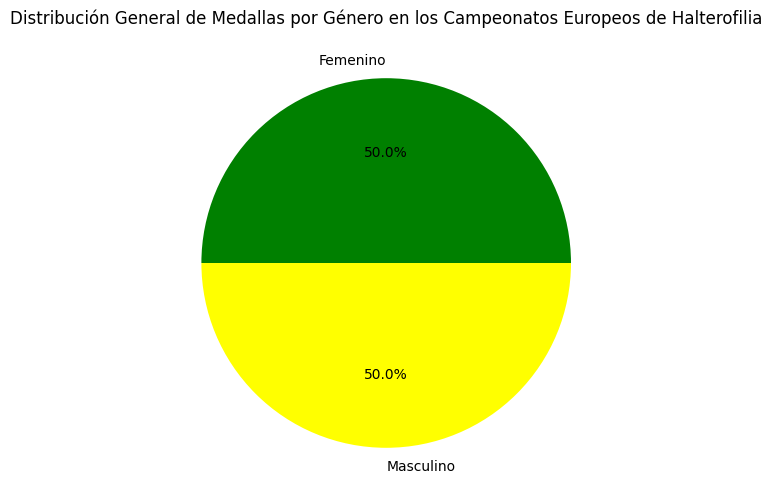

In [ ]:
plt.figure(figsize=(8, 6))
equidad[['Femenino', 'Masculino']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow'])

plt.title('Distribución General de Medallas por Género en los Campeonatos Europeos de Halterofilia')
plt.ylabel('')  # Oculta etiqueta del eje Y

plt.show()

### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [ ]:
# # Promedio del total por país y género
promedios = df_completo_1.groupby(["País", "Genero"])["Total"].mean().unstack()

#Diferencia absoluta
promedios["Diferencia"] = abs(promedios["Masculino"] - promedios["Femenino"])

# País con menor diferencia
pais_con_menor_diferencia = promedios.sort_values("Diferencia").head(10)

#creación de la columna Total
promedios['Total'] = promedios['Masculino'] + promedios['Femenino']
print(pais_con_menor_diferencia)


Genero         Femenino   Masculino  Diferencia
País                                           
Turquía      243.000000  303.200000   60.200000
Alemania     222.000000  311.000000   89.000000
Francia      220.500000  312.000000   91.500000
Moldavia     245.000000  339.000000   94.000000
Bielorrusia  242.000000  362.428571  120.428571
Letonia      221.000000  350.500000  129.500000
Italia       198.500000  348.000000  149.500000
Ucrania      242.400000  399.000000  156.600000
Azerbaiyán   211.000000  379.000000  168.000000
Rusia        225.647059  396.333333  170.686275


# **Fase 2.** Añadiendo los datos obtenidos mediante Web scraping

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [ ]:
!pip install requests
import requests
from bs4 import BeautifulSoup
!pip install lxml

## 1. Carga de datos (web scraping)

- **Paso 1: Carga los datos**

## 2. Exploración inicial

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

## 3. Limpieza de datos

- **Paso 3: Comprueba que los datos no contengan valores problemáticos**

## 4. Transformación de datos

- **Paso 4: Crea un único dataframe con los datos de 2019 en adelante**

- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

- **Paso 6: Crea las siguientes columnas:**
    - Fecha
    - Nombre
    - Apellido
    - País
    - Resultados
    - Arrancada
    - Dos tiempos
    - Total

- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**


## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?